Gerando gráficos para janelas de 29 pontos...
Gráficos gerados. Exibindo...


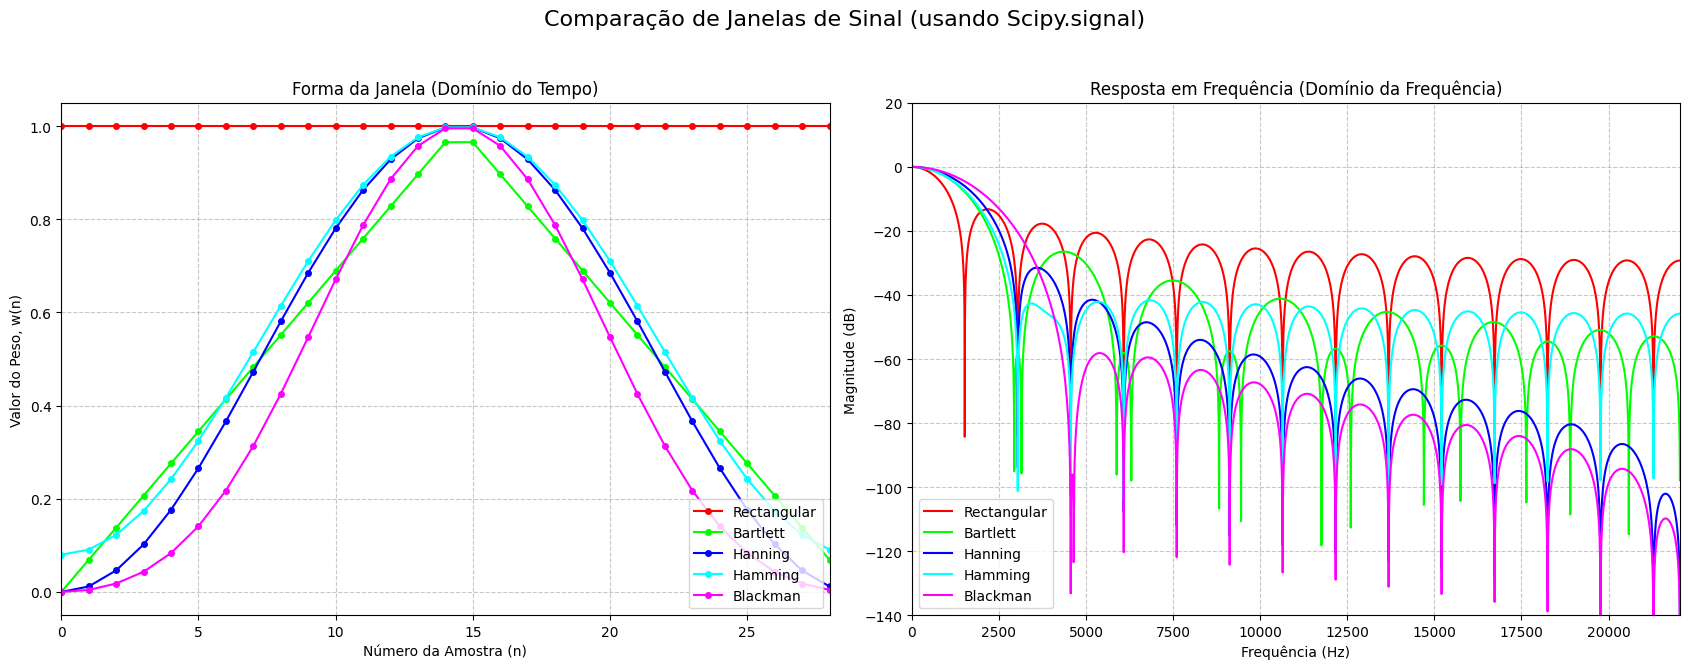

Fim.


In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# --- Configurações Principais ---

# M: Número de pontos (taps) da janela/filtro.
# No seu gráfico de exemplo, o eixo 'n' vai de 0 a 28, então M = 29.
M = 29

# fs: Frequência de amostragem (em Hz).
# Usado para definir o eixo de frequência no gráfico da esquerda.
# 44100 Hz (qualidade de CD) é um valor comum.
fs = 44100

# n_fft: Número de pontos para a Transformada de Fourier (FFT).
# Um número maior deixa o gráfico da frequência mais suave e detalhado.
n_fft = 8192

# Lista de janelas que queremos comparar
# (estes são os nomes que a função `scipy.signal.get_window` espera)
window_names = ['boxcar', 'bartlett', 'hann', 'hamming', 'blackman']

# Dicionários para Nomes e Cores (para ficar bonito como no gráfico)
# Mapeia os nomes da biblioteca para os nomes que queremos exibir
plot_labels = {
    'boxcar': 'Rectangular',
    'bartlett': 'Bartlett',
    'hann': 'Hanning',
    'hamming': 'Hamming',
    'blackman': 'Blackman'
}
# Mapeia os nomes para as cores do seu gráfico
plot_colors = {
    'boxcar': 'red',
    'bartlett': 'lime',        # 'lime' é um verde mais brilhante
    'hann': 'blue',
    'hamming': 'cyan',
    'blackman': 'magenta'
}

# --- Criação da Figura ---
# Vamos criar uma figura com 2 subplots, lado a lado
# ax1 será para a forma da janela (gráfico da direita na sua imagem)
# ax2 será para a resposta em frequência (gráfico da esquerda na sua imagem)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 7))
fig.suptitle('Comparação de Janelas de Sinal (usando Scipy.signal)', fontsize=16)

print(f"Gerando gráficos para janelas de {M} pontos...")

# --- Loop para gerar e plotar cada janela ---
for win_name in window_names:
    label = plot_labels[win_name]
    color = plot_colors[win_name]

    # 1. Obter os valores da janela (domínio do tempo)
    # Esta é a função principal do scipy.signal para criar janelas
    # Ela retorna um array numpy com os "pesos" da janela.
    win = signal.get_window(win_name, M)

    # Criar o eixo 'n' (número da amostra) para o plot
    n = np.arange(M)

    # 2. Plotar a FORMA DA JANELA (Gráfico da Direita)
    # Usamos marcadores 'o' e linhas '-' para ficar igual ao exemplo
    ax1.plot(n, win, marker='o', markersize=4, linestyle='-', label=label, color=color)

    # 3. Calcular a RESPOSTA EM FREQUÊNCIA (Gráfico da Esquerda)
    # A forma mais simples de ver a resposta em frequência da *própria* janela
    # é calcular a resposta de um filtro FIR onde os coeficientes são a janela.
    # A função `signal.freqz` faz isso.
    # w = frequências (em Hz, por causa do `fs=fs`)
    # h = resposta em frequência (valores complexos)
    w, h = signal.freqz(win, worN=n_fft, fs=fs)

    # 4. Converter a resposta para Magnitude em Decibéis (dB)
    # Usamos np.abs(h) para obter a magnitude (amplitude).
    # Adicionamos 1e-10 para evitar log(0) caso haja algum zero.
    magnitude_db = 20 * np.log10(np.abs(h) + 1e-10)

    # 5. Normalizar para que o pico principal seja 0 dB
    # Isso alinha todos os gráficos no topo, facilitando a comparação
    magnitude_db_normalized = magnitude_db - np.max(magnitude_db)

    # 6. Plotar a RESPOSTA EM FREQUÊNCIA
    ax2.plot(w, magnitude_db_normalized, label=label, color=color, linewidth=1.5)

# --- Configuração e Embelezamento dos Gráficos ---

# Configurações para o Gráfico 1: Forma da Janela (ax1)
ax1.set_title('Forma da Janela (Domínio do Tempo)')
ax1.set_xlabel('Número da Amostra (n)')
ax1.set_ylabel('Valor do Peso, w(n)')
ax1.legend(loc='lower right')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_ylim(-0.05, 1.05) # Limites do eixo Y (0 a 1)
ax1.set_xlim(0, M - 1)      # Limites do eixo X (0 a M-1)

# Configurações para o Gráfico 2: Resposta em Frequência (ax2)
ax2.set_title('Resposta em Frequência (Domínio da Frequência)')
ax2.set_xlabel('Frequência (Hz)')
ax2.set_ylabel('Magnitude (dB)')
ax2.legend(loc='lower left')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.set_ylim(-140, 20) # Limites do eixo Y, igual ao seu exemplo
ax2.set_xlim(0, fs / 2) # Plotar até a frequência de Nyquist (fs/2)

# --- Exibir o resultado ---
print("Gráficos gerados. Exibindo...")
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta o layout para o supertítulo
plt.show()

print("Fim.")

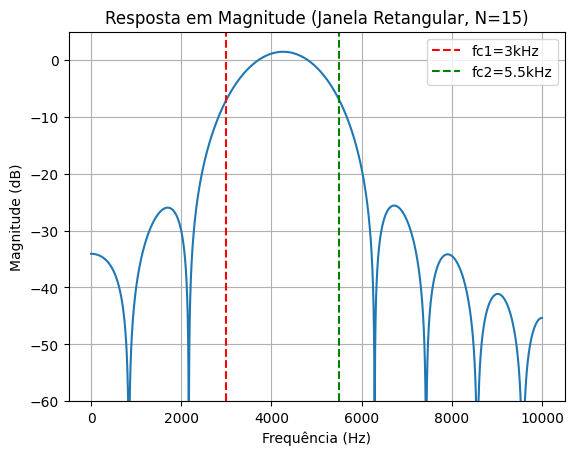

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Coeficientes do exemplo (arredondados)
h = [-0.0347, -0.0117,  0.1087,  0.0935, -0.1273, -0.2005,
      0.0569,  0.2500,  0.0569, -0.2005, -0.1273,  0.0935,
      0.1087, -0.0117, -0.0347]
fs = 20000  # Frequência de amostragem (Hz)

# Calcula a resposta em frequência
w, H = signal.freqz(h, 1, worN=8000, fs=fs)

# Plota a resposta em magnitude
plt.figure()
plt.plot(w, 20 * np.log10(np.abs(H) + 1e-6))
plt.title('Resposta em Magnitude (Janela Retangular, N=15)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.ylim([-60, 5])
plt.axvline(3000, color='r', linestyle='--', label='fc1=3kHz')
plt.axvline(5500, color='g', linestyle='--', label='fc2=5.5kHz')
plt.legend()
plt.show()


Frequência de Nyquist: 10000.0 Hz
Frequências de corte normalizadas: [0.3, 0.55]

Coeficientes do filtro (b_fir):
[-0.0005  -0.00285 -0.00042  0.00845  0.00647 -0.00984 -0.00916  0.
 -0.02035 -0.00798  0.08345  0.07909 -0.11582 -0.19204  0.05615  0.24931
  0.05615 -0.19204 -0.11582  0.07909  0.08345 -0.00798 -0.02035  0.
 -0.00916 -0.00984  0.00647  0.00845 -0.00042 -0.00285 -0.0005 ]


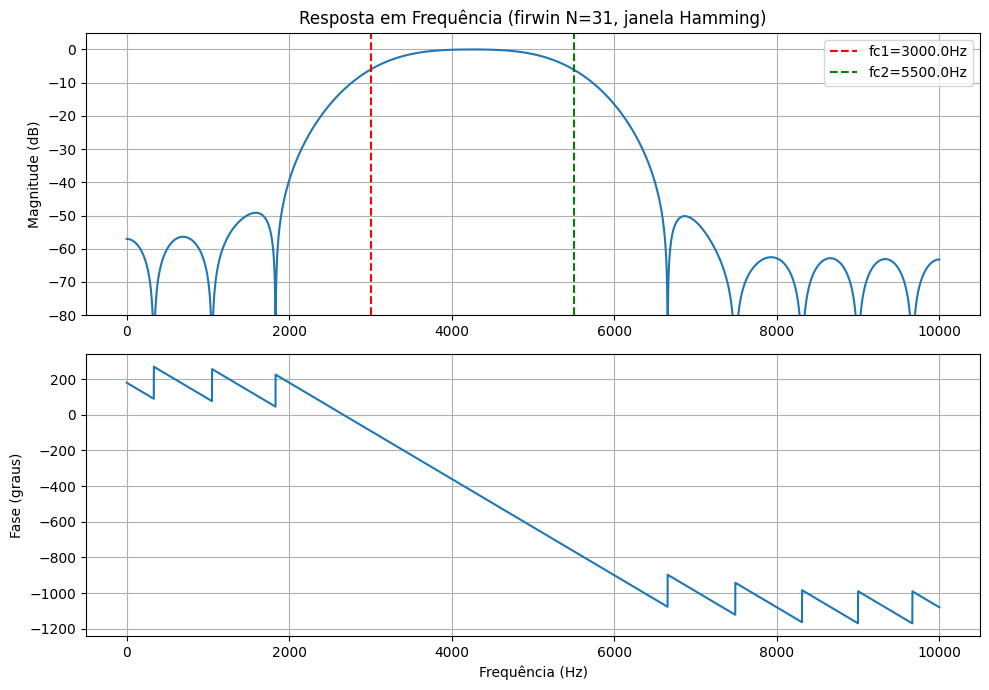

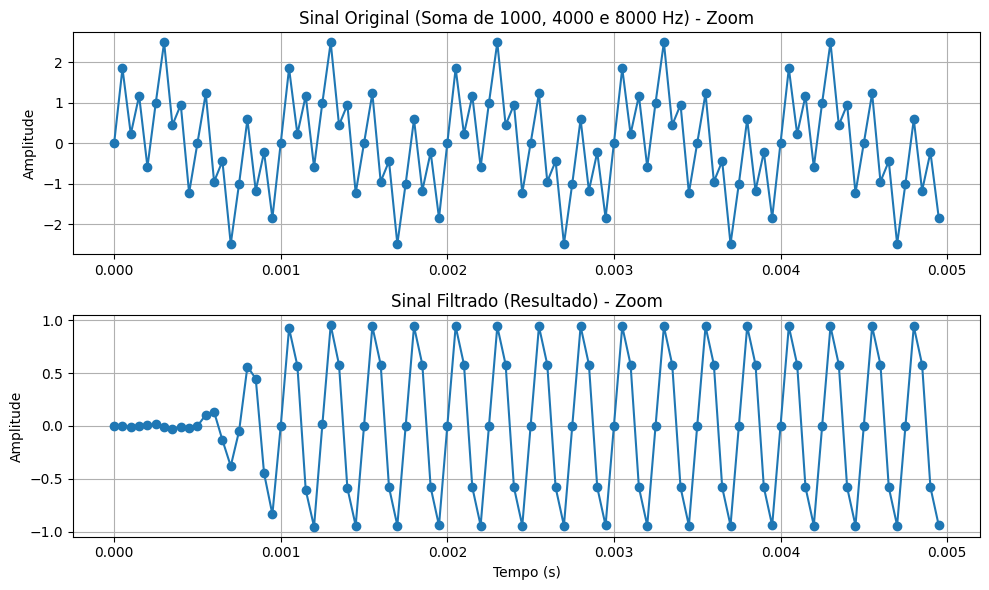

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# --- 1. Especificações do Filtro (O nosso "plano de projeto") ---

# O filtro digital "vê" o mundo através de amostras.
# Quantas amostras por segundo?
fs = 20000.0   # Frequência de amostragem (Hz). 20.000 amostras por segundo.

# Queremos um filtro "Passa-Banda": ele só deixa passar um intervalo de frequências.
fc1 = 3000.0   # Frequência de corte inferior (Hz). Abaixo disso, será atenuado.
fc2 = 5500.0   # Frequência de corte superior (Hz). Acima disso, será atenuado.

# Um filtro FIR é definido por seus "coeficientes" (números), também chamados de "taps".
# Mais coeficientes = filtro mais "afiado" (transição mais íngreme),
# mas também maior custo computacional e maior atraso (delay).
num_taps = 31    # Número de coeficientes (N). A "ordem" do filtro será N-1.

# --- 2. Projeto do Filtro (Usando a "receita" do firwin) ---

# Para filtros digitais, as frequências são normalizadas.
# A frequência máxima que podemos representar é fs/2 (Teorema de Nyquist).
nyquist = fs / 2.0

# Normalizamos nossas frequências de corte (fc1, fc2) em relação à frequência de Nyquist.
# O resultado será um valor entre 0 e 1.
cutoff_norm = [fc1 / nyquist, fc2 / nyquist]

print(f"Frequência de Nyquist: {nyquist} Hz")
print(f"Frequências de corte normalizadas: {cutoff_norm}")

# `signal.firwin` é a principal função de projeto de filtro FIR.
# Ela calcula os coeficientes (o vetor 'b') para nós.
#
# Parâmetros principais do signal.firwin:
# ------------------------------------------
# 1. num_taps:   O número de coeficientes que pedimos (31).
#
# 2. cutoff_norm: As frequências de corte normalizadas.
#                - Se for um número: [fc] -> filtro passa-baixas (lowpass)
#                - Se for uma lista: [fc1, fc2] -> filtro passa-banda (bandpass)
#
# 3. window:     O "formato" da janela aplicada. Um filtro ideal teria infinitos
#                coeficientes. A "janela" corta esse ideal para o tamanho
#                'num_taps'. 'hamming' é uma escolha popular que oferece um bom
#                equilíbrio entre atenuação e nitidez do corte.
#
# 4. pass_zero:  Este é crucial!
#                - True (padrão): Para [fc1, fc2], criaria um filtro "rejeita-banda".
#                - False: Para [fc1, fc2], cria o filtro "passa-banda" que queremos.
#
b_fir = signal.firwin(num_taps, cutoff_norm, window='hamming', pass_zero=False)

# Em um filtro FIR, a função de transferência é H(z) = B(z) / A(z).
# O denominador A(z) é sempre 1. Portanto, o vetor 'a' é apenas [1.0].
a_fir = [1.0]

print("\nCoeficientes do filtro (b_fir):")
print(np.round(b_fir, 5))

# --- 3. Análise da Resposta em Frequência (Como o filtro se comporta?) ---

# `signal.freqz` calcula a resposta em frequência de um filtro digital.
#
# Parâmetros principais do signal.freqz:
# ----------------------------------------
# 1. b: Os coeficientes do numerador (nosso 'b_fir').
# 2. a: Os coeficientes do denominador (nosso 'a_fir', que é [1.0]).
# 3. worN: O número de pontos de frequência a calcular. Mais pontos = gráfico mais suave.
# 4. fs: Informa a frequência de amostragem. Isso faz com que a função
#        retorne o eixo 'w' diretamente em Hz (muito mais fácil de ler!).
#
# Retorna:
# w: Vetor de frequências (em Hz, porque passamos 'fs').
# H: Vetor de resposta em frequência (números complexos, contêm magnitude e fase).
#
w, H = signal.freqz(b_fir, a_fir, worN=8000, fs=fs)

plt.figure(figsize=(10, 7))

# (a) Magnitude em dB
plt.subplot(2, 1, 1)
# Convertemos a magnitude (np.abs(H)) para Decibéis (dB).
# dB é uma escala logarítmica, padrão em engenharia de áudio/sinais.
# Usamos "+ 1e-9" para evitar o erro de log(0), que é -infinito.
plt.plot(w, 20 * np.log10(np.abs(H) + 1e-9))
plt.title(f'Resposta em Frequência (firwin N={num_taps}, janela Hamming)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.ylim([-80, 5]) # Define o limite do eixo Y para ver melhor a atenuação
# Linhas verticais para marcar nossas frequências de corte
plt.axvline(fc1, color='r', linestyle='--', label=f'fc1={fc1}Hz')
plt.axvline(fc2, color='g', linestyle='--', label=f'fc2={fc2}Hz')
plt.legend()

# (b) Fase
plt.subplot(2, 1, 2)
# `np.angle(H)` calcula a fase, mas ela "salta" de +180 para -180 graus.
# `np.unwrap` "desembrulha" esses saltos, mostrando a fase contínua.
angles = np.unwrap(np.angle(H)) * 180 / np.pi # Converte de radianos para graus
plt.plot(w, angles)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (graus)')
plt.grid(True)
# Nota: A fase é uma linha reta na banda passante. Isso significa
# que o filtro tem "fase linear", uma característica desejável de
# filtros FIR, pois atrasa todas as frequências igualmente,
# preservando a forma do sinal.

plt.tight_layout()
plt.show()

# --- 4. Criação de um Sinal de Teste ---

# Vamos criar um sinal com três senoides:
# 1. Uma frequência BAIXA (1000 Hz) -> Deve ser REJEITADA
# 2. Uma frequência MÉDIA (4000 Hz) -> Deve ser ACEITA (está entre 3000 e 5500)
# 3. Uma frequência ALTA (8000 Hz)  -> Deve ser REJEITADA

t = np.linspace(0, 0.3, int(fs * 0.3), endpoint=False) # Vetor de tempo (0,3 segundos)
freq_fora1 = 1000  # Fora da banda (abaixo)
freq_dentro = 4000 # Dentro da banda
freq_fora2 = 8000  # Fora da banda (acima)

sinal_teste = (np.sin(2 * np.pi * freq_fora1 * t) +
               np.sin(2 * np.pi * freq_dentro * t) +
               np.sin(2 * np.pi * freq_fora2 * t))

# --- 5. Aplicação do Filtro FIR ---

# `signal.lfilter` aplica o filtro ao nosso sinal.
#
# Parâmetros principais do signal.lfilter:
# ------------------------------------------
# 1. b: Coeficientes do numerador (nosso 'b_fir').
# 2. a: Coeficientes do denominador (nosso 'a_fir').
# 3. x: O sinal de entrada (nosso 'sinal_teste').
#
# Retorna:
# y: O sinal de saída (filtrado).
#
sinal_filtrado = signal.lfilter(b_fir, a_fir, sinal_teste)

# --- 6. Visualização no Domínio do Tempo (O que aconteceu com o sinal?) ---

plt.figure(figsize=(10, 6))

# **MUDANÇA AQUI:**
# Damos um "zoom" BEM GRANDE (menos tempo) nos primeiros pontos
# para ver as oscilações individuais e o transitório inicial.
# Vamos plotar apenas as primeiras 100 amostras.
# 100 amostras * (1 / 20000 s/amostra) = 0.005 segundos
zoom_samples = 100

plt.subplot(2, 1, 1)
# Usamos 'o-' para ver os pontos de amostragem individuais
plt.plot(t[:zoom_samples], sinal_teste[:zoom_samples], 'o-')
plt.title(f'Sinal Original (Soma de {freq_fora1}, {freq_dentro} e {freq_fora2} Hz) - Zoom')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
# Usamos 'o-' para ver os pontos de amostragem individuais
plt.plot(t[:zoom_samples], sinal_filtrado[:zoom_samples], 'o-')
plt.title('Sinal Filtrado (Resultado) - Zoom')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Observações:
# 1. Agora podemos ver as oscilações individuais.
# 2. O sinal filtrado começa em zero e "rampa" para a amplitude total.
#    Este é o "transitório" do filtro. Ele dura N-1 = 30 amostras.
# 3. O sinal filtrado está atrasado. O primeiro pico (amostra ~20)
#    corresponde ao atraso de grupo de (N-1)/2 = 15 amostras.

plt.tight_layout()
plt.show()